# Getting started with MPSlib
This a small example getting started with MPSlib through an iPython notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpslib as mps


### Setup MPSLib
First one need to initialize an instance of the mpslib object. 


In [2]:
# Initialize MPSlib using default algortihm, and seetings
O = mps.mpslib();

# Initialize MPSlib using the mps_snesim_tree algorthm, and a simulation grid of size [80,70,1]
O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=[80,70,1])

# specific parameters can be parsed directly when calling mps.mpslib (as abobve), or set by updating the O and O.par structure as 
#O.parameter_filename = 'mps_snesim.txt'
O.par['debug_level']=-1
O.par['n_cond']=25
O.par['n_real']=16
O.par['n_threads']=5
O.par['do_entropy']=1
O.par['simulation_grid_size']=np.array([80,50,1])

/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib
Using mps_genesim installed in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin (scikit-mps in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)
/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib
Using mps_snesim_tree installed in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin (scikit-mps in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)


In [3]:
# All adjustable parameters for the specifric chosen MPSlib algorithm are
O.par

{'n_real': 16,
 'rseed': 1,
 'n_max_cpdf_count': 1,
 'out_folder': '.',
 'ti_fnam': 'ti.dat',
 'simulation_grid_size': array([80, 50,  1]),
 'origin': array([0., 0., 0.]),
 'grid_cell_size': array([1, 1, 1]),
 'mask_fnam': 'mask.dat',
 'hard_data_fnam': 'hard.dat',
 'shuffle_simulation_grid': 2,
 'entropyfactor_simulation_grid': 4,
 'shuffle_ti_grid': 1,
 'hard_data_search_radius': 1,
 'soft_data_categories': array([0, 1]),
 'soft_data_fnam': 'soft.dat',
 'n_threads': 5,
 'debug_level': -1,
 'do_estimation': 0,
 'do_entropy': 1,
 'template_size': array([8, 7, 1]),
 'n_multiple_grids': 3,
 'n_min_node_count': 0,
 'n_cond': 25}

### Choose training image

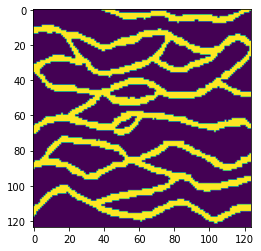

In [4]:

TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
#TI, TI_filename = mps.trainingimages.rot90()
O.par['ti_fnam']=TI_filename
plt.imshow(TI[:,:,0].T)

### Run MPSlib

The chosen MPSlib algorithm is run using a single thread by executing 

    O.run()
    
and using multiple threads by executing

    O.run_parallel()


In [5]:
O.run()
#if __name__ == '__main__':
#    O.run_parallel()

mpslib: trying to run 'mps_snesim_tree' on 'mps.txt' in folder '/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin/mps_snesim_tree'
mpslib: 'mps_snesim_tree' ran in   19.55s 
loading entropy from ti_strebelle_2.dat_ent_0.gslib


True

### Plot some realizations using matplotlib

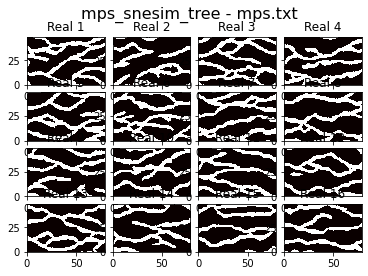

In [6]:
O.plot_reals()